In [1]:
import seaborn as sns
import pandas as pd
import scipy
import random
import os

In [2]:
def pearsonTest(string1, string2):
    lData1= list(string1)
    lData2= list(string2)
    sData1=[ord(val) for val in lData1]
    sData2=[ord(val) for val in lData2]
    # Apply the pearsonr()
    corr, _ = scipy.stats.pearsonr(sData1, sData2)
    # print('Pearsons correlation: %.3f' % corr) # return
    return corr

In [3]:
def linearTest(string1, string2):
    lData1= list(string1)
    lData2= list(string2)
    sData1=[ord(val) for val in lData1]
    sData2=[ord(val) for val in lData2]
    result  = scipy.stats.linregress(sData1, sData2)
    corr  = result.rvalue
    #print('Linear correlation: %.3f' % corr) # return
    return corr

In [4]:
def spearmanTest(string1, string2):
    lData1= list(string1)
    lData2= list(string2)
    sData1=[ord(val) for val in lData1]
    sData2=[ord(val) for val in lData2]
    result,_  = scipy.stats.spearmanr(sData1, sData2)
    # corr  = result.pvalue
    #print('Spearman correlation: %.3f' % corr) # return
    return result

In [5]:
def anovaTest(string1, string2):
    lData1= list(string1)
    lData2= list(string2)
    sData1=[ord(val) for val in lData1]
    sData2=[ord(val) for val in lData2]
    _, p  = scipy.stats.f_oneway(sData1, sData2)
    corr  = _ 
    #print('ANOVA correlation: %.3f' % corr) # return
    return corr

In [6]:
# Path = "D:/PythonProjects/Data/Encryption/CSS"
# file1="Plain-1.txt"
# file2="Cipher-1.txt"
# Plain_path = f"{Path}/{file1}"
# Cipher_path = f"{Path}/{file2}"
# f = open(Plain_path,'r')
# Plain =f.read()
# f.close()
# f = open(Cipher_path,'r')
# Cipher =f.read()
# f.close()
# val = spearmanTest(Plain, Cipher)
# print(val)

Maximum 1.0912567793801825e-29
Minimum -1.207248522427436e-29
Average 2.342678183260161e-32
STD 1.2468771971669156e-30


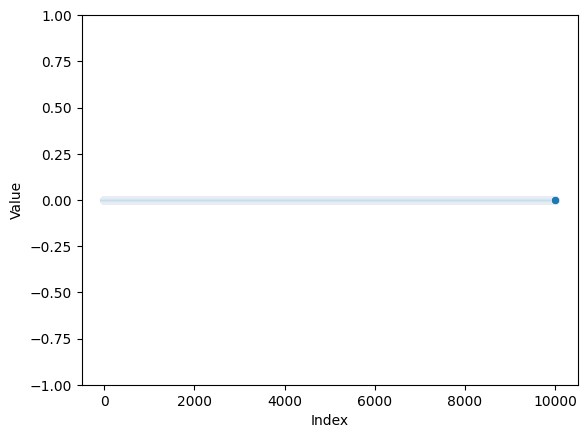

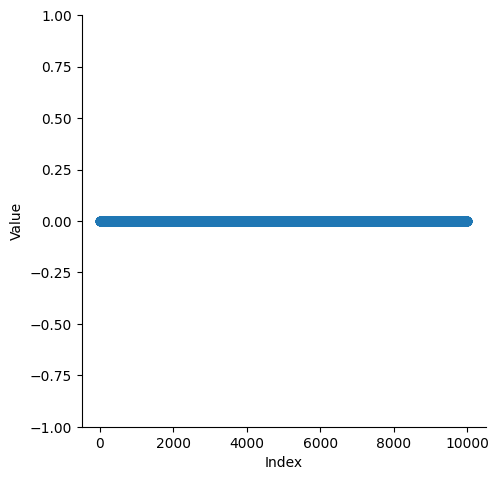

In [12]:
Path = "D:/PythonProjects/Data/Encryption/CSSKS2"
Plain = []
Cipher = []
Output1 = []
os.chdir(Path)

# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
# Plain vs. Cipher
    
#     if file.endswith(".txt") and file.startswith('P'):
#         Plain_path = f"{Path}/{file}"
#         f = open(Plain_path,'r')
#         Plain.append(f.read())
#         f.close()
        
#         CipherFile = file[(file.index('n')+1):file.index('.txt')]
#         CipherFile = "Cipher"+CipherFile+".txt"
#         Cipher_path= f"{Path}/{CipherFile}"
#         f = open(Cipher_path,'r')
#         Cipher.append(f.read())
#         f.close()

# Cipher vs. Cipher
    if file.endswith(".txt") and file.startswith('Cipher1'):
        Plain_path = f"{Path}/{file}"
        f = open(Plain_path,'r')
        Plain.append(f.read())
        f.close()
        
        CipherFile = file[(file.index('1')+1):file.index('.txt')]
        CipherFile = "Cipher2"+CipherFile+".txt"
        Cipher_path= f"{Path}/{CipherFile}"
        f = open(Cipher_path,'r')
        Cipher.append(f.read())
        f.close()

for i in range (len(Plain)):
    #val = pearsonTest(Plain[i], Cipher[i])
    #val = linearTest(Plain[i], Cipher[i])
    #val = spearmanTest(Plain[i], Cipher[i])
    val = anovaTest(Plain[i], Cipher[i])
    Output1.append(val)
    
data = []
for i in range (len(Output1)):
    data.append([i+1, Output1[i]])

    
    
# Create the pandas DataFrame
df = pd.DataFrame(data, columns=['Index', 'Value'])

# print (type(df[0]))
# print (type(df[1]))
print("Maximum "+str(df['Value'].max()))
print("Minimum "+str(df['Value'].min()))
print("Average "+str(df['Value'].mean()))
print("STD "+str(df['Value'].std()))

scatter = sns.scatterplot(x="Index", y="Value", data=df);
scatter.set_ylim(bottom=-1.0, top=1.0);

lm = sns.lmplot(x="Index", y="Value", data=df);
lm.set(ylim=(-1.0, 1.0))